<a href="https://colab.research.google.com/github/19PA1A0495/cv-ip-31-/blob/main/cv_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import itertools
import cv2 as cv
from keras.preprocessing import image
from keras.models import load_model
from keras.models import Model
import keras

In [2]:
train_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/train"
test_dir = "/content/drive/MyDrive/CVDataset/casting_data/casting_data/test"

In [3]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,horizontal_flip=True)
training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=True)
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(300,300),batch_size=32,class_mode = "binary",shuffle=False)

Found 6647 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [4]:

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit_generator(training_set,steps_per_epoch =50,epochs = 10,validation_data = test_set)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 1366s 27s/step - loss: 1.0670 - accuracy: 0.5134 - val_loss: 0.6852 - val_accuracy: 0.6336
Epoch 2/10
50/50 [==============================] - 793s 16s/step - loss: 0.6645 - accuracy: 0.6172 - val_loss: 0.6213 - val_accuracy: 0.6979
Epoch 3/10
50/50 [==============================] - 623s 12s/step - loss: 0.6295 - accuracy: 0.6672 - val_loss: 0.5774 - val_accuracy: 0.7007
Epoch 4/10
50/50 [==============================] - 503s 10s/step - loss: 0.5905 - accuracy: 0.6937 - val_loss: 0.4748 - val_accuracy: 0.7720
Epoch 5/10
50/50 [==============================] - 434s 9s/step - loss: 0.4696 - accuracy: 0.7799 - val_loss: 0.4700 - val_accuracy: 0.7790
Epoch 6/10
50/50 [==============================] - 393s 8s/step - loss: 0.3686 - accuracy: 0.8243 - val_loss: 0.2560 - val_accuracy: 0.8965
Epoch 7/10
50/50 [==============================] - 378s 8s/step - loss: 0.2985 - accuracy: 0.8825 - val_loss: 0.2179 - val_accuracy: 0.9203
Epoch 8/

Test score

In [8]:
batch_size = 10
test_score = model.evaluate_generator(test_set, batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 91.87%
[INFO] Loss:  0.20250821113586426


Training Accuracy vs Validation Accuracy

Text(0.5, 1.0, 'Accuracy Curves')

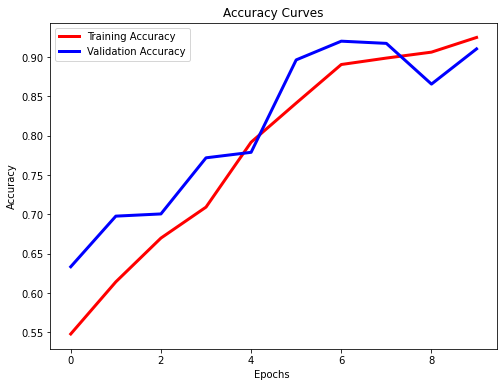

In [9]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

In [11]:
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[453   0]
 [262   0]]


In [12]:
target_names = []
for key in training_set.class_indices:
    target_names.append(key)

In [14]:
print('Classification Report')

print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   def_front       0.63      1.00      0.78       453
    ok_front       0.00      0.00      0.00       262

    accuracy                           0.63       715
   macro avg       0.32      0.50      0.39       715
weighted avg       0.40      0.63      0.49       715



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
